In [103]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [105]:
from sklearn import metrics

In [106]:
df = pd.read_csv("IDF_2019_to_2021_v3.csv", sep =',')
df.head(3)

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,Maison,terrains_a_batir,terrains_autre,prix_m²,section_cadastrale,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee,type_bien
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,NaN,RUE DE LA FONTAINE,0650,77220.0,...,1,0,1,3069.31,772150000B,3646.883495,3474.511880,2019,0,Maison
1,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,NaN,AV DE LA GARE,0600,77340.0,...,0,0,0,3039.22,77373000AD,3804.018010,3759.720085,2019,0,Appartement
2,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,NaN,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,...,0,0,0,2585.94,77445000YA,2821.665116,2610.471778,2019,0,Appartement


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364462 entries, 0 to 364461
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_mutation                364462 non-null  object 
 1   valeur_fonciere            364462 non-null  float64
 2   date_mutation              364462 non-null  object 
 3   numero_disposition         364462 non-null  float64
 4   nature_mutation            364462 non-null  object 
 5   adresse_numero             356391 non-null  float64
 6   adresse_suffixe            23783 non-null   object 
 7   adresse_nom_voie           364460 non-null  object 
 8   adresse_code_voie          364462 non-null  object 
 9   code_postal                364462 non-null  float64
 10  code_commune               364462 non-null  int64  
 11  nom_commune                364462 non-null  object 
 12  code_departement           364462 non-null  int64  
 13  id_parcelle                36

Suppression des variables à exploiter (non numériques)

In [108]:
df1 =df.drop(['id_mutation','date_mutation','nature_mutation','adresse_suffixe','adresse_nom_voie',
             'adresse_code_voie','nom_commune','id_parcelle', 'section_cadastrale','type_bien' ,'adresse_numero','longitude',
             'latitude'], axis = 1)


In [109]:
df1.head(3)

,valeur_fonciere,numero_disposition,code_postal,code_commune,code_departement,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²,prix_m²_moy_ca,prix_m²_moy_co,annee,code_annee
0,310000.0,1.0,77220.0,77215,77,0,101.0,4.0,855.0,0,0,1,0,1,3069.31,3646.883495,3474.511880,2019,0
1,155000.0,1.0,77340.0,77373,77,2,51.0,2.0,0.0,1,1,0,0,0,3039.22,3804.018010,3759.720085,2019,0
2,165500.0,1.0,77176.0,77445,77,3,64.0,3.0,12.0,1,2,0,0,0,2585.94,2821.665116,2610.471778,2019,0


Description des variables numériques 

In [110]:
print(df1.describe())

       valeur_fonciere  numero_disposition    code_postal   code_commune  \
count     3.644620e+05       364462.000000  364462.000000  364462.000000   
mean      3.478103e+05            1.006308   85930.144912   85847.920645   
std       2.900089e+05            0.084307    8421.372260    8323.324014   
min       5.000000e+02            1.000000   75001.000000   75101.000000   
25%       1.773562e+05            1.000000   77230.000000   77243.000000   
50%       2.679000e+05            1.000000   91330.000000   91377.000000   
75%       4.070000e+05            1.000000   93370.000000   93062.000000   
max       3.000000e+06            5.000000   95880.000000   95690.000000   

       code_departement    nombre_lots  surface_reelle_bati  \
count     364462.000000  364462.000000        364462.000000   
mean          85.658938       1.646051            66.647889   
std            8.348542       1.312962            36.085938   
min           75.000000       0.000000             0.000000   


Vérification de l'absence de NaN

In [46]:
df1.isna().sum()

valeur_fonciere              0
numero_disposition           0
code_postal                  0
code_commune                 0
code_departement             0
nombre_lots                  0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
Appartement                  0
Dépendance                   0
Maison                       0
terrains_a_batir             0
terrains_autre               0
prix_m²                      0
prix_m²_moy_ca               0
prix_m²_moy_co               0
annee                        0
code_annee                   0
dtype: int64

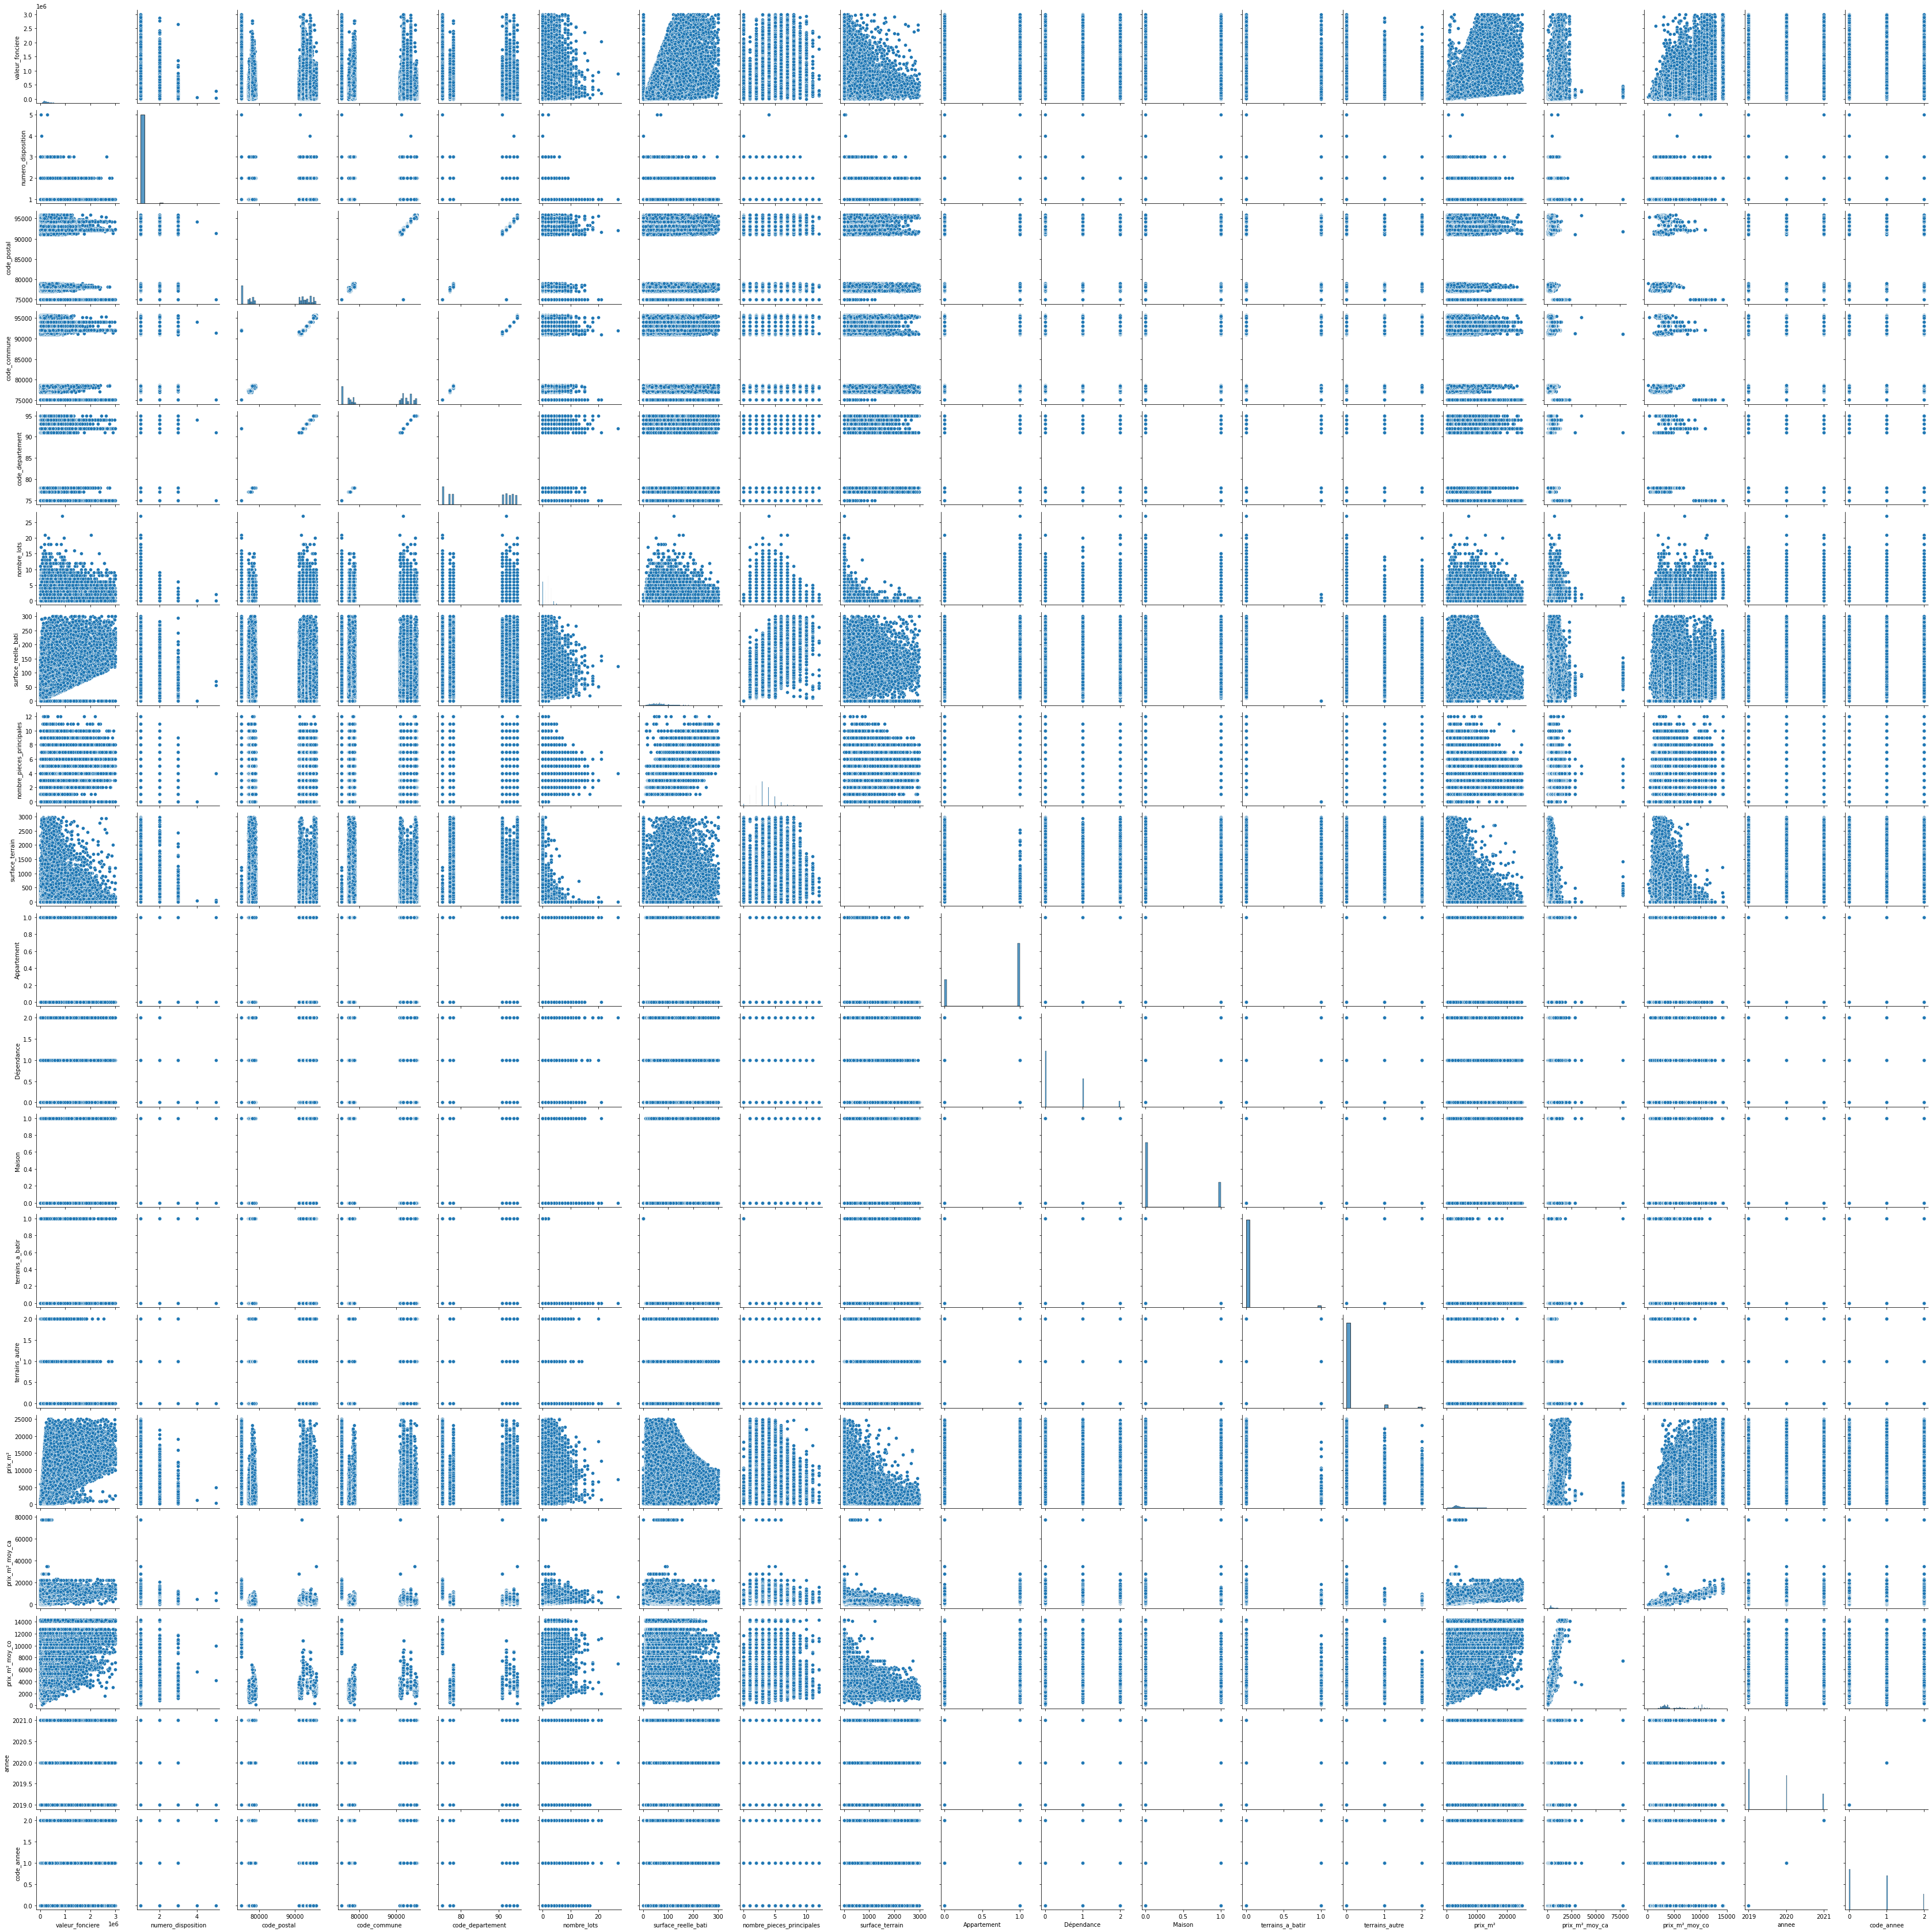

In [38]:
sns.pairplot(df1);

In [111]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(df['valeur_fonciere'], df['numero_disposition']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,0.005110
p-value,0.002037


In [112]:
#pvalue : s'assurer que les coeffs sont stat sig
#from sklearn import metrics : voir quelle metric utiliser (R2?)


Définition de la variable cible (y) et des variables explicatives (X)

In [113]:
X, y = df1.drop("valeur_fonciere", axis=1), df1['valeur_fonciere']

In [121]:
corr = df1.corr(method=pearsonr_pval)
print(corr)

                           valeur_fonciere  numero_disposition   code_postal  \
valeur_fonciere               1.000000e+00        2.036696e-03  0.000000e+00   
numero_disposition            2.036696e-03        1.000000e+00  5.525301e-03   
code_postal                   0.000000e+00        5.525301e-03  1.000000e+00   
code_commune                  0.000000e+00        7.847520e-03  0.000000e+00   
code_departement              0.000000e+00        2.284670e-02  0.000000e+00   
nombre_lots                  2.220860e-198        0.000000e+00  6.587769e-09   
surface_reelle_bati           0.000000e+00       4.129110e-115  0.000000e+00   
nombre_pieces_principales     0.000000e+00        1.411115e-56  0.000000e+00   
surface_terrain              8.475129e-193       6.194644e-138  3.868482e-99   
Appartement                  3.542161e-132        0.000000e+00  0.000000e+00   
Dépendance                   1.547784e-110       6.147248e-141  0.000000e+00   
Maison                       6.991583e-2

Séparation des données en ensemble d'apprentissage et de test 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Normalisation des données numériques

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.07529448, -1.294306  , -1.2876498 , ...,  1.74107983,
         0.37710421,  0.37710421],
       [-0.07529448,  1.09254101,  1.12713662, ..., -0.57404161,
        -0.98049422, -0.98049422],
       [-0.07529448, -1.29418727, -1.28752967, ...,  1.39194991,
         0.37710421,  0.37710421],
       ...,
       [-0.07529448,  0.98568322,  0.98286448, ...,  0.74317663,
        -0.98049422, -0.98049422],
       [-0.07529448,  0.76484377,  0.74621493, ...,  0.09341761,
         1.73470264,  1.73470264],
       [-0.07529448,  0.76721838,  0.74441303, ...,  0.26778414,
        -0.98049422, -0.98049422]])

In [125]:
scaler.transform(X_test)

array([[-0.07529448, -1.29454346, -1.28789005, ...,  1.59322213,
         0.37710421,  0.37710421],
       [-0.07529448,  0.77196762,  0.74957848, ...,  0.01515918,
        -0.98049422, -0.98049422],
       [-0.07529448,  0.88238734,  0.86213717, ..., -0.71909063,
         0.37710421,  0.37710421],
       ...,
       [-0.07529448, -0.99949721, -1.04847759, ..., -0.7198023 ,
         0.37710421,  0.37710421],
       [-0.07529448, -1.29406854, -1.28740955, ...,  1.06943392,
         1.73470264,  1.73470264],
       [-0.07529448,  0.7019164 ,  0.64182485, ..., -0.96234792,
        -0.98049422, -0.98049422]])

In [126]:
StandardScaler()
print(scaler.mean_)


[1.00635527e+00 8.59181736e+04 8.58360997e+04 8.56471847e+01
 1.64781578e+00 6.66602965e+01 3.07265862e+00 1.21172169e+02
 7.03809390e-01 4.35838515e-01 2.76102741e-01 2.00878694e-02
 5.58358399e-02 5.49500363e+03 5.49766982e+03 5.49539488e+03
 2.01972223e+03 7.22226986e-01]


In [127]:
#scaler = preprocessing.StandardScaler().fit(df1)
#df1[df1.columns] = pd.DataFrame(scaler.transform(df1), index=df1.index)

Création d'un régresseur lr et ajustement 

In [128]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [129]:
cross_validate(lr, X, y, return_train_score=True, cv=4)['test_score'].mean()

0.7975316835984547

Score (R²) du modèle sur l'échantillon d'apprentissage puis par validation croisée 

In [131]:
print('Coefficient de détermination du modèle :', lr.score(X_train, y_train))
print('Coefficient de détermination obtenu par Cv :', cross_val_score(lr,X_train,y_train).mean())

Coefficient de détermination du modèle : 0.8128943226850568
Coefficient de détermination obtenu par Cv : 0.8127746247789764


Les scores obtenus sur l'échantillon d'apprentissage sont corrects.
Le coefficient R² ne baisse pas lors de l'évaluation par validation croisée, il n'y a pas de problème de sur-apprentissage.

In [136]:
y_pred=lr.predict(X_test)
print(y_pred)

[503980.37461005 383844.36074204 290696.48199301 ... 325018.09293022
 249385.55935058 161507.75922804]


In [137]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8126283120380378

Score (R²) du modèle sur l'ensemble de test

In [59]:
lr.score(X_test, y_test)

0.8157627056504051

Le score obtenu sur l'ensemble de test est correct

Représentation des résidus en fonction de y ('valeur foncière')

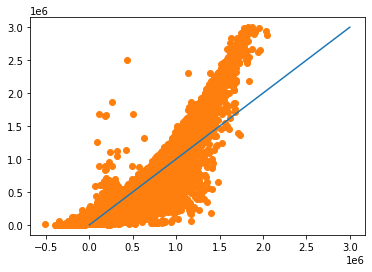

In [61]:
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test, c='#ff7f0e')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));

Les points ne sont pas homogènes autour de la droite

Nuage des points représentant les résidus en fonction des valeurs de y_train

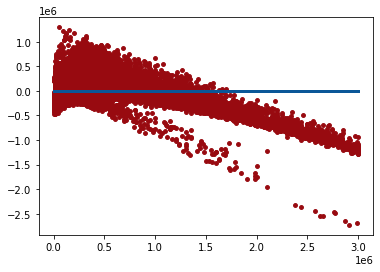

In [63]:
pred_train = lr.predict(X_train)
residus = pred_train - y_train

plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

Les points ne sont pas répartis uniformément autour de la droite d'équation

In [64]:
import scipy.stats as stats

Q-Q plot

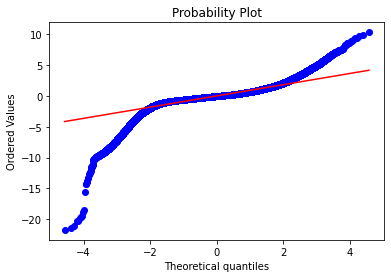

In [65]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)

plt.show();

Les points ne s'alignent pas vraiment le long de la droite.
les données rejetent l'hypothèse de normalité

Tableau de corrélations

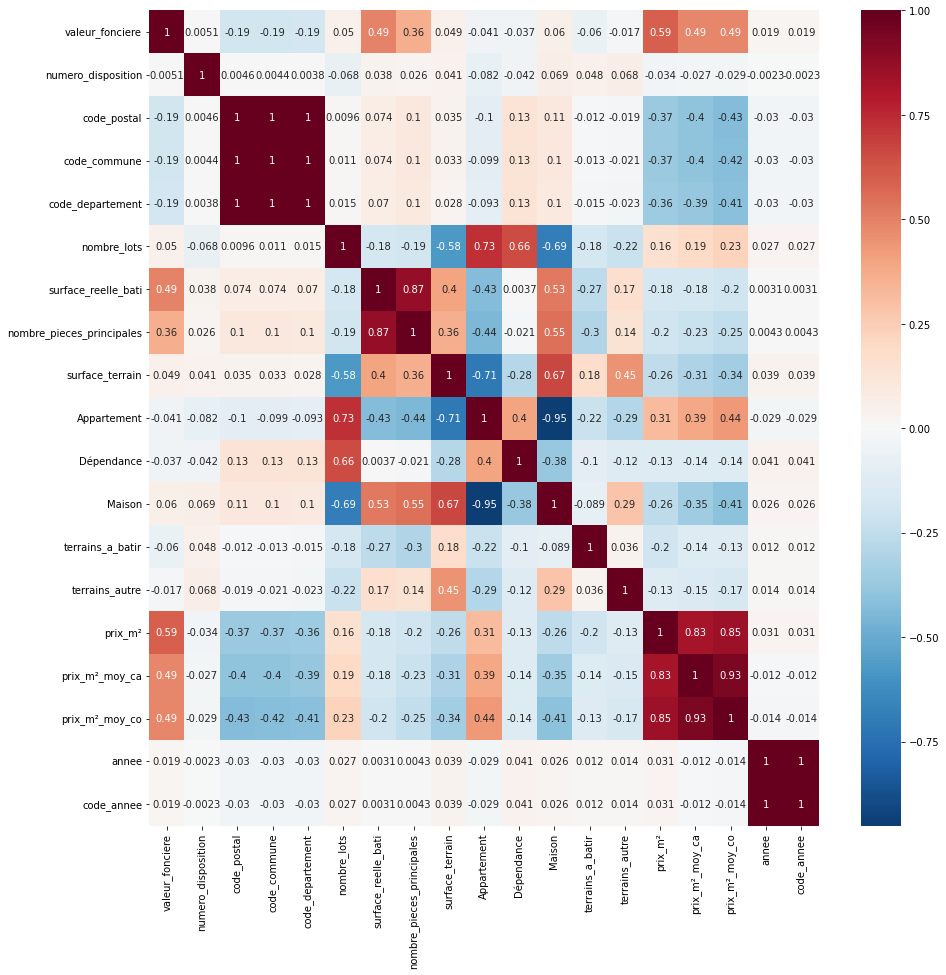

In [69]:
plt.figure(figsize=(15, 15))

sns.heatmap(df1.corr(), annot=True, cmap="RdBu_r", center=0);

Si on exclu les variables liées au prix m2 (variables crées à partir de valeur foncière), peu de variables semblent être corrélées avec notre y. 
On peut tester un modèle affiné avec surface réélle bati et nombre de pièces principales

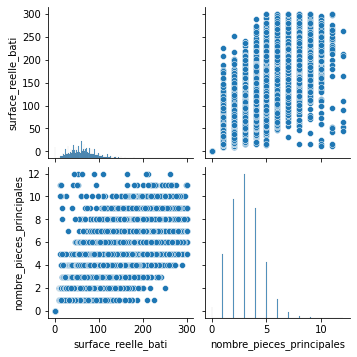

In [70]:
sns.pairplot(df1[['surface_reelle_bati', 'nombre_pieces_principales']]);

la relation entre la variable cible et les 2 variables les plus corrélées n'est pas linéaire